# Assignment 02 ( Deep neural network )



---

Hyperparameter Setting 5

---


CSE 4238 - Soft Computing Lab

---


ID : 170104037

---


Sec : A

---


Date : 02/09/2021

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Importing necessary libraries

In [ ]:
import os
from os import path
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

# Task 1
*  Unzipping the dataset
*  ID = 37 , so Dataset C was loaded


In [ ]:
!unzip '/content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/Dataset C.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   



---

---
**Dropping all the columns except ‘filename’ and ‘digit’ from csv file**


---



---



In [ ]:
c_csv = pd.read_csv('/content/training-c.csv')
print(c_csv.columns)
csv_file = c_csv[['filename', 'digit']]

csv_file.to_csv('Dataset.csv',index=False)


Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')


In [ ]:
dataset_csv = pd.read_csv('Dataset.csv')
dataset_csv.head() #First 5 Rows of the CSV File

,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7




---



---


# Preparing the dataset for future training


---



In [ ]:

class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

TRAIN_PATH = '/content/training-c'
dataset  = Dataset(dataset_csv, TRAIN_PATH, train_transform)

print("Trainig Samples: ",len(dataset))

Trainig Samples:  24298


#An example of training data

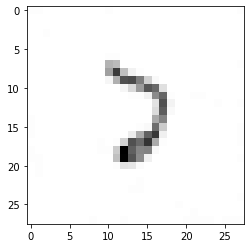

In [ ]:
show_img = dataset[1][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap = 'gray')

---

---


# Task 2


*   Experiment 02




---



---




*   Increasing the accuracy of Experiment 01 upto
85% or more I have considered less number of hidden layers with same hidden nodes, same learning rate and same optimizer function. But I have increased the iteration number and used 2 different activation function.




---




#Hyperparameter Setting 5
*   No of hidden layers = 2
*   Hidden Nodes = 600
*   Iteration = 80500
*   Learning rate = 0.03
*   Batch size = 64
*   Number of epoch = 265
*   Activation Function : ReLU, ReLU6
*   Optimizer : SGD
*   Accuracy : 87.96%
*   Loss : 0.03

In [ ]:
#5
batch_size = 64
num_iters = 80500
input_dim = 28*28
output_dim = 10
learning_rate = 0.03
num_hidden = 600  #number of hidden node
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# split data 20% for testing
test_size = int(0.2*len(dataset))
train_size = len(dataset)-test_size

train_data, test_data = torch.utils.data.random_split(dataset,[train_size,test_size])

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    shuffle =True )

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    shuffle = False)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:304
Test dataloader:76


In [ ]:
#5
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

265


In [ ]:
#5
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 600
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 600 --> 600
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU6()

        ### Output layer: 600 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


#5
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size=input_dim,
                                num_classes=output_dim,
                                num_hidden = num_hidden)

#To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=600, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=600, out_features=600, bias=True)
  (relu_2): ReLU6()
  (linear_out): Linear(in_features=600, out_features=10, bias=True)
)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [ ]:
#5
iteration_loss = []
iter = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.283648729324341. Accuracy: 16.093846470467174
Iteration: 1000. Loss: 2.370776891708374. Accuracy: 11.504424778761061
Iteration: 1500. Loss: 2.2228658199310303. Accuracy: 17.719695410578307
Iteration: 2000. Loss: 2.1517088413238525. Accuracy: 30.211977773204364
Iteration: 2500. Loss: 2.1525793075561523. Accuracy: 29.121218357686768
Iteration: 3000. Loss: 2.0071887969970703. Accuracy: 35.31590862317349
Iteration: 3500. Loss: 1.9400290250778198. Accuracy: 22.720724428894833
Iteration: 4000. Loss: 2.023477077484131. Accuracy: 37.64149001852233
Iteration: 4500. Loss: 1.9542949199676514. Accuracy: 31.734924881662895
Iteration: 5000. Loss: 1.9760328531265259. Accuracy: 26.589833299032723
Iteration: 5500. Loss: 1.5821127891540527. Accuracy: 36.40666803869109
Iteration: 6000. Loss: 1.7421464920043945. Accuracy: 45.79131508540852
Iteration: 6500. Loss: 1.6888952255249023. Accuracy: 34.73965836591891
Iteration: 7000. Loss: 1.4754185676574707. Accuracy: 46.75859230294299
It

[2.283648729324341, 2.370776891708374, 2.2228658199310303, 2.1517088413238525, 2.1525793075561523, 2.0071887969970703, 1.9400290250778198, 2.023477077484131, 1.9542949199676514, 1.9760328531265259, 1.5821127891540527, 1.7421464920043945, 1.6888952255249023, 1.4754185676574707, 1.5108506679534912, 1.3862313032150269, 1.696323275566101, 1.5507320165634155, 1.412917971611023, 1.1090906858444214, 1.1349128484725952, 1.302505612373352, 1.459201455116272, 1.0852138996124268, 1.1102803945541382, 1.269930362701416, 1.1466082334518433, 1.1081836223602295, 1.0659173727035522, 1.112434983253479, 1.357769250869751, 1.2051515579223633, 1.1400550603866577, 0.9175627827644348, 0.784356415271759, 0.8520402312278748, 1.2033227682113647, 0.849220335483551, 0.846443772315979, 0.7916572093963623, 0.6436634063720703, 0.6596087217330933, 0.8262781500816345, 0.6579148173332214, 0.6470807790756226, 0.7619191408157349, 0.7396345138549805, 0.5803587436676025, 0.43389207124710083, 0.5680450201034546, 0.416272133

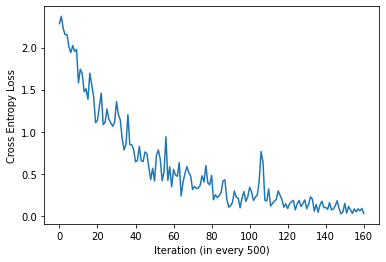

In [ ]:
#5
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
root_path = '/content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/'

save_model = True

if save_model is True:
    # Saves only parameters
    # weights & biases
    torch.save(model.state_dict(), root_path + 'Setting_5.pkl') 

# Prediction for Experiment 02


*  Loading the model of experiment 02
*  Plotting first 5 images
*  Predict the labels

Trained Model Loaded


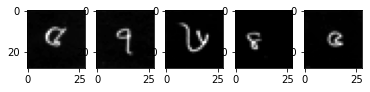

Predicted labels [5 7 6 4 5]


In [ ]:
#Load model
root_path = '/content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/'
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Setting_5.pkl'))
    print('Trained Model Loaded')

#Plotting first five image
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

#Prediction
predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

In [ ]:
#table for 5 settings

values = []
setting = ['1','2','3','4','5']
Accu = ['10.35%','10.08%','58.72%','76.27%','87.96%']
Loss = ['2.30','2.44','1.24','0.55','0.03']
Batch_sz = ['20','32','128','128','64']
num_itr = ['20,000','20,000','30,000','50,000','80,500']
epoch = ['21','33','200','332','265']
learning_rate = ['0.01','0.01','0.01','0.02','0.03']
Optimizr = ['SGD','Adam','SGD','SGD','SGD']
Hidden_nodes = ['200','200','250','200','600']
Hidden_layer = ['6','6','4','3','2']
Activation_func = ['ReLU,ReLU6,PReLU','ReLU,Tanh,LeakyReLU,PReLU,ELU','ReLU,ReLU6','ReLU,ReLU6,LeakyReLU','ReLU,ReLU6']

for i in range(len(setting)):
    values.append([setting[i],Accu[i],Loss[i],Batch_sz[i],num_itr[i],epoch[i],learning_rate[i],Optimizr[i],Hidden_nodes[i],Hidden_layer[i],Activation_func[i] ])
     
colName = ['Setting No','Accuracy','Loss','Batch Size','Num_Iters','Epoch','Learning Rate','Optimizer','Hidden Nodes','Number of Hidden layer','Activation Function']
df = pd.DataFrame (values,columns = colName)
df

,Setting No,Accuracy,Loss,Batch Size,Num_Iters,Epoch,Learning Rate,Optimizer,Hidden Nodes,Number of Hidden layer,Activation Function
0,1,10.35%,2.30,20,"20,000",21,0.01,SGD,200,6,"ReLU,ReLU6,PReLU"
1,2,10.08%,2.44,32,"20,000",33,0.01,Adam,200,6,"ReLU,Tanh,LeakyReLU,PReLU,ELU"
2,3,58.72%,1.24,128,"30,000",200,0.01,SGD,250,4,"ReLU,ReLU6"
3,4,76.27%,0.55,128,"50,000",332,0.02,SGD,200,3,"ReLU,ReLU6,LeakyReLU"
4,5,87.96%,0.03,64,"80,500",265,0.03,SGD,600,2,"ReLU,ReLU6"
